In [1]:
# PCA 16 components Synthetic Data

# PCA anomaly detection SCADAS

PCA used for anomaly detection <br>

Normal and attack real data<br>


In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages = 3 

2022-10-06 22:44:18.070209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-06 22:44:18.070241: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
def label_marker(row):
    if isinstance(row['marker'], str) and 'Natural' in row['marker']:
        return 0
    if isinstance(row['marker'], str) and 'Attack' in row['marker']:
        return 1
    return 

In [4]:
# assign number of components
n_comp = 16

In [5]:
#path = './data/Zero_Day/'
path = './new_data/'
path_figures = './figures/'
path_normal = path + 'normal.csv' # real data
path_normal = path +'VAE_syntheticdata_normal_epoch100_1000000.csv'


path_attack = path + 'attack.csv' # real data

normal_df = pd.read_csv(path_normal)  
attack_df = pd.read_csv(path_attack)  

normal_df['marker'] = normal_df.apply(label_marker, axis=1)
attack_df['marker'] = attack_df.apply(label_marker, axis=1)

normal_label = normal_df['marker'].to_numpy() 
attack_label = attack_df['marker'].to_numpy() 

print(len(normal_label))
print(len(attack_label))

#adding noise to x_train
#noise = np.random.normal(0, NOISE, traffic_np_norm.shape)

1000000
55663


In [6]:
# Delete marker column 
normal_df.drop(['marker'], axis=1, inplace=True)
attack_df.drop(['marker'], axis=1, inplace=True)

In [7]:
# each row of the dataframe is considered a sequence
# we create a numpy array with the sequences
normal_np = normal_df.to_numpy()
print('normal shape',normal_np.shape)
attack_np = attack_df.to_numpy()
print('attack shape', attack_np.shape)

normal shape (1000000, 128)
attack shape (55663, 128)


In [8]:
normal_df = normal_df.replace([np.inf, -np.inf], 0)
scaler = MinMaxScaler()
normal_scaled = scaler.fit_transform(normal_df)

attack_df = attack_df.replace([np.inf, -np.inf], 0)
scaler = MinMaxScaler()
attack_scaled = scaler.fit_transform(attack_df)

In [9]:
norm_samples = normal_scaled
attack_samples = attack_scaled
print (attack_samples.shape)
print (norm_samples.shape)

(55663, 128)
(1000000, 128)


In [10]:
# generate train set
# training set will consist of the normal ds

len_norm = len(norm_samples)
len_norm_train = int(0.80 * len_norm)
X_train = norm_samples[:len_norm_train]

# generate test set consist of 50% attack and 50% normal

X_test_norm = norm_samples[len_norm_train:]
len_attack_test = len(X_test_norm) # we will use the same number
X_test_attack = attack_scaled[:len_attack_test]

X_test = np.concatenate([X_test_norm, X_test_attack])
y_test = np.ones(len(X_test))
y_test[:len(X_test_norm)] = np.zeros(len(X_test_norm))

In [11]:
#x_train = traffic_np_norm[...,np.newaxis]
#x_combine = combine_np_norm[...,np.newaxis]
#x_attack = attack_np_norm[...,np.newaxis]
print("Normal Traffic Training input shape: ", X_train.shape)
print("Test Traffic Test input shape: ", X_test.shape, )

Normal Traffic Training input shape:  (800000, 128)
Test Traffic Test input shape:  (255663, 128)


In [12]:
# Apply PCA to input

model_input_PCA = PCA(n_components=None, random_state=123, 
                      svd_solver='arpack')
X_transform_input = model_input_PCA.fit_transform(X_train)



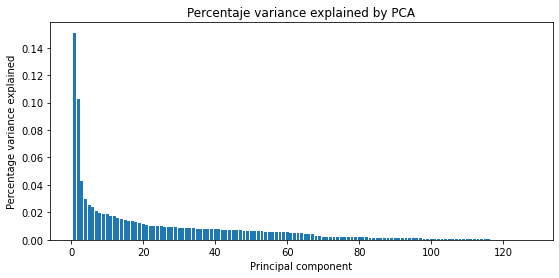

In [13]:
fig,ax = plt.subplots(1,1, figsize=(9,4))
ax.bar(
   x = np.arange(model_input_PCA.n_components_) + 1,
   height = model_input_PCA.explained_variance_ratio_
)

ax.set_title('Percentaje variance explained by PCA')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage variance explained');
plt.show()

------------------------------------------
Cummulated variance explained
------------------------------------------
[0.15096842 0.25346925 0.29630299 0.32607671 0.35124224 0.37517258
 0.396232   0.41595319 0.43483252 0.45360278 0.47083167 0.48786067
 0.50410022 0.51917888 0.53354755 0.54725066 0.56069868 0.57348094
 0.58579967 0.59751445 0.60850292 0.61891666 0.62928772 0.63942318
 0.64937324 0.6590487  0.66861679 0.67783125 0.68685294 0.6956602
 0.70432783 0.71297055 0.7214805  0.72989525 0.73811906 0.74615363
 0.7540732  0.76194918 0.76973341 0.77750704 0.78509225 0.79248122
 0.79975585 0.80694275 0.81402917 0.82104471 0.8280115  0.83476506
 0.84146288 0.84804878 0.85443489 0.86063282 0.86675035 0.87256161
 0.87832662 0.8840239  0.88967376 0.89512933 0.90048728 0.90581609
 0.91107996 0.91618823 0.92095468 0.92566593 0.9298833  0.93398365
 0.93800412 0.94075733 0.94334389 0.94574497 0.94809879 0.9503935
 0.95261192 0.954705   0.95677522 0.95881233 0.96075305 0.96267178
 0.96452908 0.9

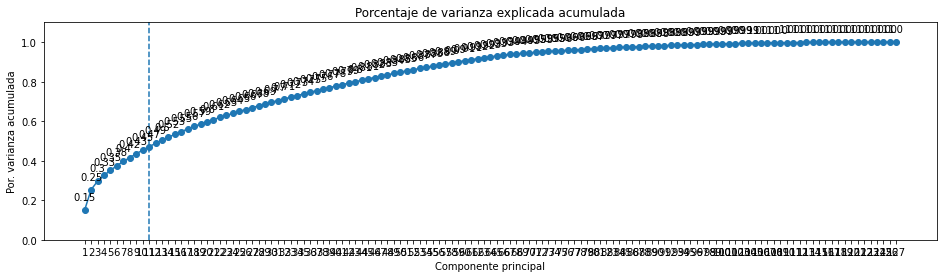

In [14]:
# Cummulated variance explained
# ==============================================================================
prop_varianza_acum = model_input_PCA.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Cummulated variance explained')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax.plot(
    np.arange(model_input_PCA.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(model_input_PCA.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_input_PCA.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');



In [15]:
# Projection reconstruction
# ==============================================================================
X_train_df = pd.DataFrame(X_train)

projections = model_input_PCA.transform(X_train_df)
reconstruction = model_input_PCA.inverse_transform(X=projections)

reconstruccion = pd.DataFrame(
                    reconstruction,
                    columns = X_train_df.columns,
                    index   = X_train_df.index,
)

print('------------------')
print('Original values')
print('------------------')
display(reconstruccion.head(3))

print('')
print('---------------------')
print('Reconstruction values')
print('---------------------')
display(X_train_df.head(3))

------------------
Original values
------------------


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.623762,0.807716,0.505886,0.680621,0.798411,0.696931,0.427694,0.268159,0.526814,0.377369,...,-2.627433e-18,-2.340092e-16,-5.551115e-17,-1.804112e-16,-2.081668e-17,-3.469447e-17,2.318725e-16,5.285432e-16,1.948257e-16,4.301513e-16
1,0.591591,0.825392,0.710891,0.699241,0.844095,0.685540,0.328181,0.252639,0.819130,0.343038,...,5.516016e-17,-1.246624e-15,2.289835e-16,4.163336e-17,3.261280e-16,4.857226e-17,2.528079e-16,-6.270640e-16,-8.894513e-16,-2.364934e-16
2,0.981485,0.826384,0.939974,0.703139,0.783916,0.662075,0.464212,0.312171,0.592049,0.508611,...,7.447773e-16,1.512223e-15,2.081668e-17,0.000000e+00,-1.318390e-16,1.387779e-17,-1.317916e-15,3.280574e-15,2.021587e-15,1.499470e-15



---------------------
Reconstruction values
---------------------


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.623762,0.807716,0.505886,0.680621,0.798411,0.696931,0.427694,0.268159,0.526814,0.377369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.591591,0.825392,0.710891,0.699241,0.844095,0.685540,0.328181,0.252639,0.819130,0.343038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.981485,0.826384,0.939974,0.703139,0.783916,0.662075,0.464212,0.312171,0.592049,0.508611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def reconstruccion_error(X, n_components, X_new=None):
    '''
    Function that calculates reconstruction error of two dataframes
    
    Parameters
    ----------
    
    X (data.frame): Dataframe to train the PCA
    X_new (data.frame): Dataframe to apply reconstruction
    n_components: number of components for the PCA application
    
    Returns
    -------
    
    Reconstruction dataframe 
    Numpy array with reconstruction error
    
    '''
    
    if X_new is None:
        X_new = X
    
    # Entrenamiento modelo PCA con escalado de los datos
    pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=n_components,
                                random_state=124))
    pca_pipeline.fit(X=X)
    
    # Proyectar los datos
    proyecciones = pca_pipeline.transform(X_new)
    
    # Reconstrucción
    reconstruccion = pca_pipeline.inverse_transform(proyecciones)
    reconstruccion = pd.DataFrame(
                        reconstruccion,
                        columns = X_new.columns,
                        index   = X_new.index
                    )
    # RMSE
    error_reconstruccion = reconstruccion - X_new
    error_reconstruccion = error_reconstruccion**2
    error_reconstruccion = error_reconstruccion.mean(axis=1)
    
    print(f"Reconstruction with a PCA of {n_components} components")
    
    return reconstruccion, error_reconstruccion

In [17]:
# Reconstruction error with n components
X_test_attack_df = pd.DataFrame(X_test_attack)
X_train_df       = pd.DataFrame(X_train)
X_train_df       = X_train_df.head(50000)
rec_normal, error_normal = reconstruccion_error(X=X_train_df, 
                                                n_components = n_comp)

rec_attack, error_attack = reconstruccion_error(X=X_train_df, 
                           n_components =n_comp, 
                           X_new=X_test_attack_df)

Reconstruction with a PCA of 16 components
Reconstruction with a PCA of 16 components


In [18]:
# Let's do a PCA reconstruction again

X_test_norm = X_test[0:len(X_test_attack)]   # We balance both labels by equaling vectors
X_test = np.concatenate([X_test_norm, X_test_attack])
y_test = np.ones(len(X_test))
y_test[:len(X_test_norm)] = np.zeros(len(X_test_norm))
X_test_df = pd.DataFrame(X_test)

reconstruction_test, error_test = reconstruccion_error(X = X_test_norm, n_components = n_comp,
                                                       X_new = X_test_df)

Reconstruction with a PCA of 16 components


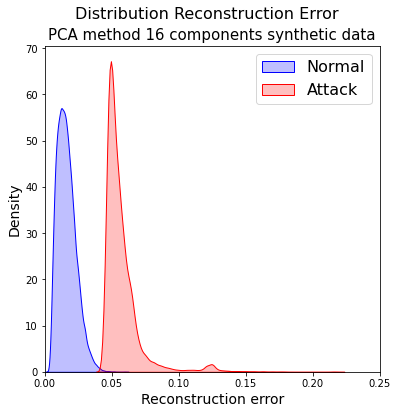

In [19]:
# === Paper Figure ===
# Distribución reconstruction error 

df_results = pd.DataFrame({
                    'error_reconstruction' : error_test,
                    'type'                 : y_test})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df_results[df_results['type']==0].error_reconstruction,
    fill    = True,
    ax      = ax,
    label   = 'Normal',
    color   = 'blue'
)
sns.kdeplot(
    df_results[df_results['type']==1].error_reconstruction,
    fill    = True,
    ax      = ax,
    label   = 'Attack',
    color   = 'red'
)
#sns.rugplot(error_reconstruccion,  ax=ax, color='black')
plt.suptitle('Distribution Reconstruction Error',y=0.97, 
            fontsize=16)
ax.set_title('PCA method '+str(n_comp)+' components synthetic data', fontsize=15)
ax.set_xlabel('Reconstruction error', fontsize = 14);
ax.set_ylabel('Density',fontsize=14);
ax.set_xlim(0,0.25)
plt.legend( fontsize=16)
plt.savefig(path_figures+'PCA_anomalies_'+str(n_comp)+'_syn.png', dpi=600)
plt.show()

In [20]:
# Let's do a PCA reconstruction again

X_test_norm = X_test[0:len(X_test_attack)]   # We balance both labels by equaling vectors
X_test = np.concatenate([X_test_norm, X_test_attack])
y_test = np.ones(len(X_test))
y_test[:len(X_test_norm)] = np.zeros(len(X_test_norm))
X_test_df = pd.DataFrame(X_test)

reconstruction_test, error_test = reconstruccion_error(X = X_test_norm, n_components = n_comp,
                                                       X_new = X_test_df)

Reconstruction with a PCA of 16 components


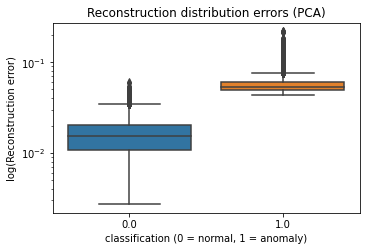

In [21]:
# test result

df_results = pd.DataFrame({
                    'error_reconstruction' : error_test,
                    'type'                 : y_test})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 3.5))
sns.boxplot(
    x     = 'type',
    y     = 'error_reconstruction',
    data  = df_results,
    ax    = ax
)
ax.set_yscale("log")
ax.set_title('Reconstruction distribution errors (PCA)')
ax.set_ylabel('log(Reconstruction error)')
ax.set_xlabel('classification (0 = normal, 1 = anomaly)');

In [22]:
df_results['type'].value_counts()

0.0    55663
1.0    55663
Name: type, dtype: int64

In [23]:
rmse_error = df_results.error_reconstruction.to_numpy()
error_threshold = np.median(rmse_error)
print('error threshold >>>', error_threshold)

anomalies = (rmse_error > error_threshold)
np.count_nonzero(anomalies) / len(anomalies)
print('total length vector anomalies : ',len(anomalies))
print('Number of anomalies : ', np.count_nonzero(anomalies))
print('total length of y_test vector',len(y_test))
print('total lenght of attacks in y_test vector', np.count_nonzero(y_test))

error threshold >>> 0.04366876262700185
total length vector anomalies :  111326
Number of anomalies :  55663
total length of y_test vector 111326
total lenght of attacks in y_test vector 55663


In [24]:
print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55663
         1.0       1.00      1.00      1.00     55663

    accuracy                           1.00    111326
   macro avg       1.00      1.00      1.00    111326
weighted avg       1.00      1.00      1.00    111326



In [25]:
#==================

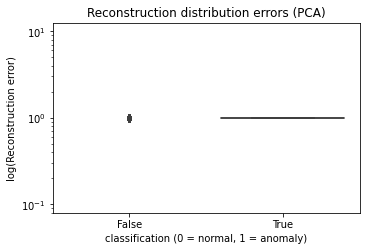

In [26]:
df_results = pd.DataFrame({
                    'anomaly' : anomalies,
                    'label'   : y_test
                })

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 3.5))
sns.boxplot(
    x     = 'anomaly',
    y     = 'label',
    data  = df_results,
    #color = "white",
    palette = 'tab10',
    ax    = ax
)
ax.set_yscale("log")
ax.set_title('Reconstruction distribution errors (PCA)')
ax.set_ylabel('log(Reconstruction error)')
ax.set_xlabel('classification (0 = normal, 1 = anomaly)');

In [27]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

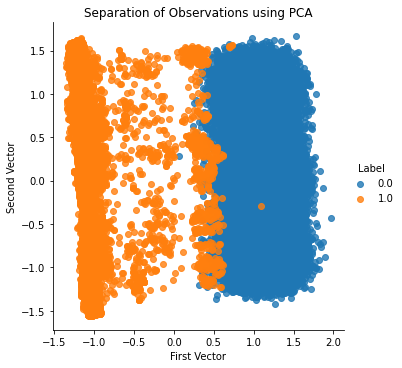

In [28]:
n_components = 2
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_test_PCA = pca.fit_transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(X_test_PCA_inverse)

scatterPlot(X_test_PCA, pd.Series(y_test) , "PCA")

In [29]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [30]:
#anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
#preds = plotResults(y_test, anomalyScoresPCA, True)

In [31]:
import session_info
session_info.show(html=False)

-----
keras               2.7.0
matplotlib          3.5.0
numpy               1.23.1
pandas              1.3.4
seaborn             0.11.2
session_info        1.0.0
sklearn             1.0.1
tensorflow          2.7.0
-----
IPython             7.29.0
jupyter_client      7.0.6
jupyter_core        4.9.1
-----
Python 3.8.12 (default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
Linux-5.15.0-48-generic-x86_64-with-glibc2.17
-----
Session information updated at 2022-10-06 22:45


In [32]:
#===============================0

In [33]:
#EOF